# Figures

In [1]:
from pathlib import Path
import warnings

import cmocean as cm
import intake
import matplotlib.pyplot as plt
import xarray as xr

from plotting import (
    create_grid,
    add_coastline,
    add_continents,
    add_colorbar,
    add_title,
    plot_data
)

In [2]:
ds = xr.open_dataset("/home/ljg48/project/data/oae-uncertainty-data/fractional-uncertanties-1x1-1993-2022.nc")
ds_mask = xr.open_dataset("/home/ljg48/project/data/lsm/processed/ocean-mask_invariant_1x1.nc")

In [3]:
frac_sol_squared = (ds['frac_sol_sss']**2) + (ds['frac_sol_sst']**2)

In [4]:
frac_kw_squared = (
    (ds['frac_kw_umean']**2) 
    + (ds['frac_kw_ustd']**2)
    + (ds['frac_kw_sc']**2)
) 

In [5]:
frac_flux_squared = frac_sol_squared + frac_kw_squared + ds["frac_pco2"]**2

# fractional uncertainties normalized
- ERA5 has excessive zonal winds in tropics: https://os.copernicus.org/articles/15/831/2019/
- CCMP bias https://www.mdpi.com/2072-4292/15/4/1040
- https://bg.copernicus.org/articles/15/1701/2018/bg-15-1701-2018.pdf

In [17]:
import matplotlib as mpl

Text(0.5, 0, 'unitless')

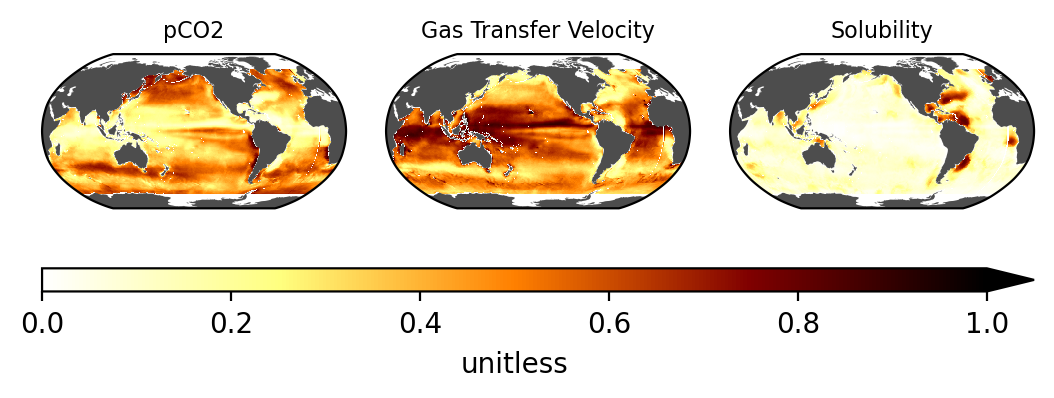

In [43]:
vmin = 0
vmax = 1
cmap = mpl.cm.afmhot_r #cm.cm.haline

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 3), cbar_size='5%')


ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
data1 = ((ds['frac_pco2']**2) / frac_flux_squared ).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data1, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='pCO2', fontsize=8)


ind = 1
data2 = (frac_kw_squared  / frac_flux_squared).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data2, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Gas Transfer Velocity', fontsize=8)


ind = 2
data3 = (frac_sol_squared  / frac_flux_squared ).mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data3, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Solubility', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

# Dominance map

In [ ]:
# plot where each term is > 0.5xt

# Fractional Uncertainties

Text(0.5, 0, 'unitless')

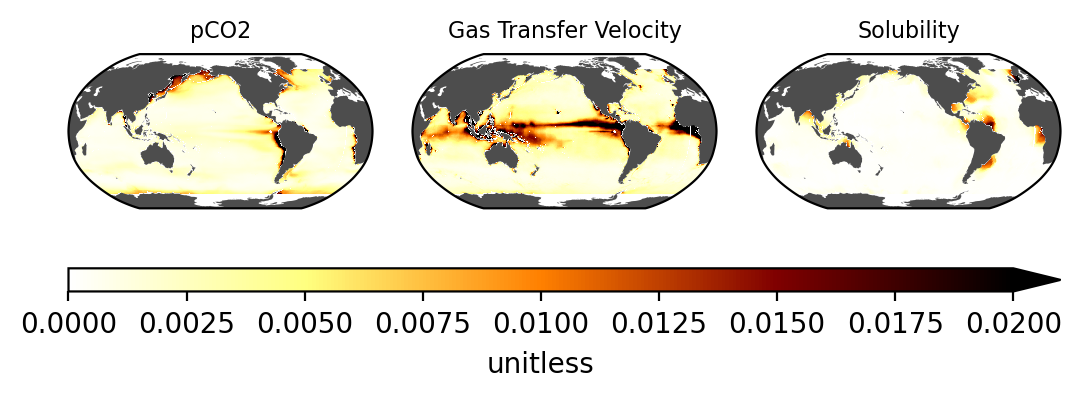

In [44]:
vmin = 0
vmax = 0.02
cmap = mpl.cm.afmhot_r

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 3), cbar_size='5%')


ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
data = ((ds['frac_pco2']**2)).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='pCO2', fontsize=8)


ind = 1
data = frac_kw_squared.mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Gas Transfer Velocity', fontsize=8)


ind = 2
data = frac_sol_squared.mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Solubility', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

Yes, studies suggest that general circulation models (GCMs) might indeed simulate ocean partial pressure of CO₂ (pCO₂) differently in upwelling zones like the eastern equatorial Pacific and western boundary currents. These differences are driven by the unique processes in these regions, including intense upwelling, which brings nutrient-rich and carbon-rich waters to the surface, increasing CO₂ outgassing.

For instance, upwelling systems such as the Humboldt Current System (HumCS) and Canary Current System (CanCS) are net sources of CO₂ due to the persistent upwelling of warm, carbon-rich waters. The eastern boundary upwelling systems (EBUS) also show high temporal variability in pCO₂ driven by climate modes like El Niño, which alters upwelling intensity and water characteristics, leading to significant variability in CO₂ fluxes across different models. Similarly, decadal fluctuations driven by phenomena like the Pacific Decadal Oscillation affect the thermocline depth, biological productivity, and hence pCO₂ in these areas


https://bg.copernicus.org/articles/16/329/2019/


GOBM differences: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023MS003840

Biolgical repsonse upwelling Eastern boundary currents https://www.mbari.org/project/biological-response-to-upwelling-in-eastern-boundary-upwelling-systems/ https://www.mbari.org/project/biological-response-to-upwelling-in-eastern-boundary-upwelling-systems/

comparison model variablity: https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2020.571720/full

# Gas trasnfer Velocity

Text(0.5, 0, 'unitless')

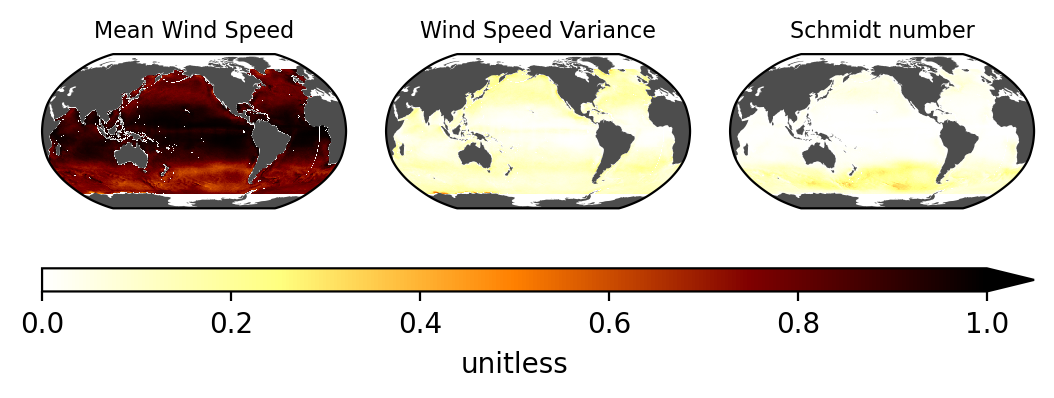

In [45]:
vmin = 0
vmax = 1
cmap = mpl.cm.afmhot_r

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 3), cbar_size='5%')


ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
data = ((ds['frac_kw_umean']**2) / frac_kw_squared).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Mean Wind Speed', fontsize=8)


ind = 1
data = ((ds['frac_kw_ustd']**2) / frac_kw_squared).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Wind Speed Variance', fontsize=8)


ind = 2
data = ((ds['frac_kw_sc']**2) / frac_kw_squared).mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Schmidt number', fontsize=8)

#ind = 2
#data = ((frac_sol_squared)/(frac_sol_sss**2)).mean('time').where(ds_mask['mask'] == 1)
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=0, vmax=1)
#add_title(grid, ind, title='Ko / SSS', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

Text(0.5, 0, 'unitless')

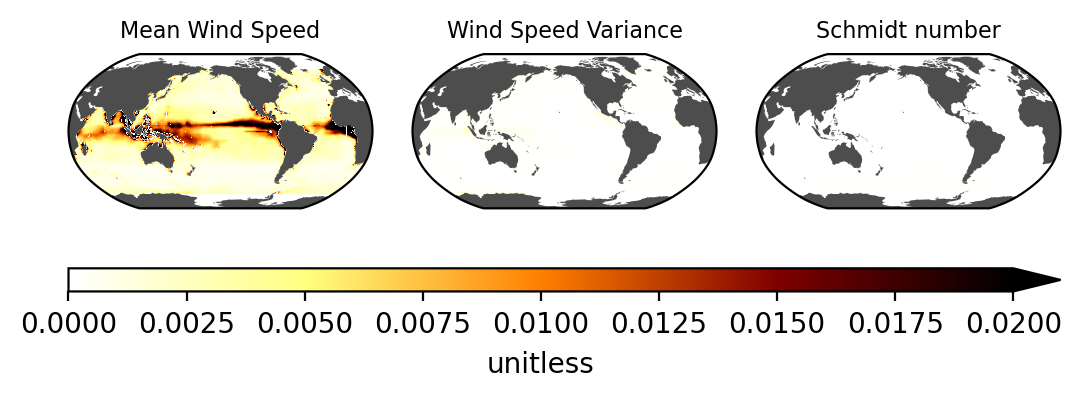

In [47]:
vmin = 0
vmax = 0.02
cmap = mpl.cm.afmhot_r

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 3), cbar_size='5%')


ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
data = ((ds['frac_kw_umean']**2) ).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Mean Wind Speed', fontsize=8)


ind = 1
data = ((ds['frac_kw_ustd']**2) ).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Wind Speed Variance', fontsize=8)


ind = 2
data = ((ds['frac_kw_sc']**2) ).mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Schmidt number', fontsize=8)

#ind = 2
#data = ((frac_sol_squared)/(frac_sol_sss**2)).mean('time').where(ds_mask['mask'] == 1)
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=0, vmax=1)
#add_title(grid, ind, title='Ko / SSS', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

In [29]:
# make plot of zonal average wind speed for products, show divergence in tropics

# Solubility

Text(0.5, 0, 'unitless')

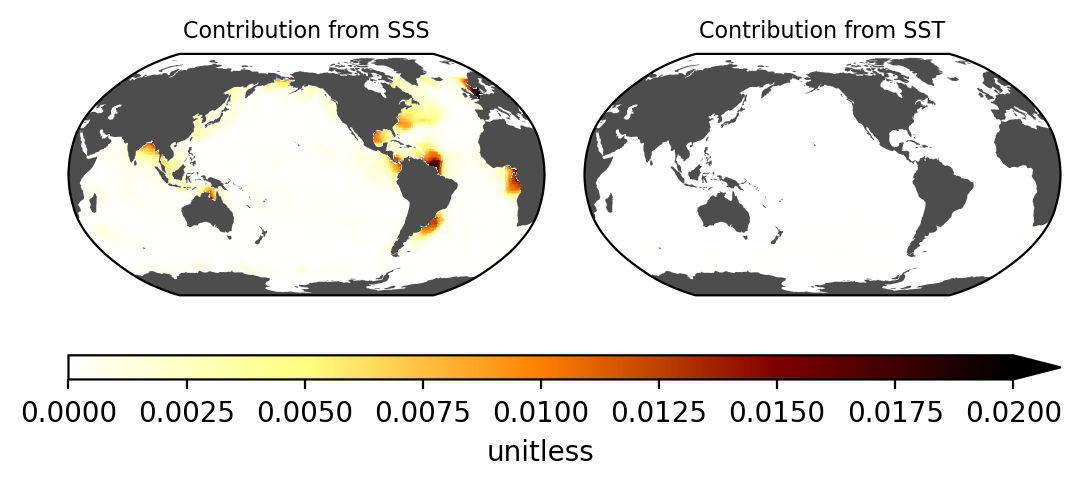

In [49]:
vmin = 0
vmax = 0.02
cmap = mpl.cm.afmhot_r

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 2), cbar_size='5%')


#ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
##data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=vmin, vmax=vmax)
#add_title(grid, ind, title='Solubilty fractional uncertainty', fontsize=8)


ind = 0
data = ((ds['frac_sol_sss']**2)).mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Contribution from SSS', fontsize=8)

ind = 1
data = ((ds['frac_sol_sst']**2)).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Contribution from SST', fontsize=8)



#ind = 2
#data = ((frac_sol_squared)/(frac_sol_sss**2)).mean('time').where(ds_mask['mask'] == 1)
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=0, vmax=1)
#add_title(grid, ind, title='Ko / SSS', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

# this is from rivers

Text(0.5, 0, 'unitless')

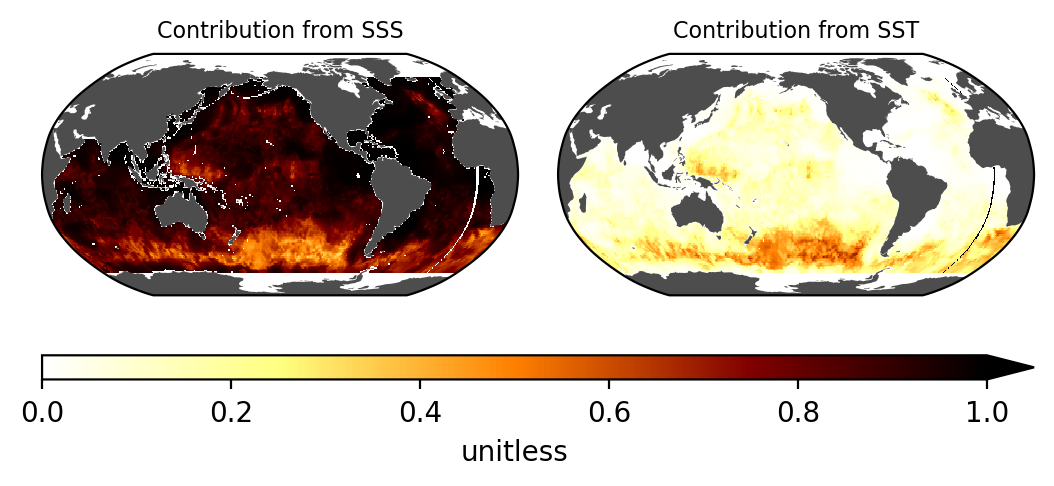

In [40]:
vmin = 0
vmax = 1
cmap = mpl.cm.afmhot_r

fig = plt.figure(dpi=200)

grid = create_grid(fig, axes_pad=0.2, nrows_ncols=(1, 2), cbar_size='5%')


#ind = 0
#data = ((frac_sol_squared)).mean('time').where(ds_mask['mask'] == 1)
##data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=vmin, vmax=vmax)
#add_title(grid, ind, title='Solubilty fractional uncertainty', fontsize=8)


ind = 0
data = ((ds['frac_sol_sss']**2) / frac_sol_squared).mean('time').where(ds_mask['mask'] == 1)
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Contribution from SSS', fontsize=8)

ind = 1
data = ((ds['frac_sol_sst']**2)/ frac_sol_squared).mean('time').where(ds_mask['mask'] == 1)
#data = ((frac_sol_squared).mean('time').where(ds_mask['mask'] == 1) / (frac_sol_sst**2).mean('time').where(ds_mask['mask'] == 1))
grid = add_continents(grid, ind)
plot_data(grid, ind, data, vmin=vmin, vmax=vmax, cmap=cmap)
add_title(grid, ind, title='Contribution from SST', fontsize=8)



#ind = 2
#data = ((frac_sol_squared)/(frac_sol_sss**2)).mean('time').where(ds_mask['mask'] == 1)
#grid = add_continents(grid, ind)
#plot_data(grid, ind, data, vmin=0, vmax=1)
#add_title(grid, ind, title='Ko / SSS', fontsize=8)

col = add_colorbar(grid, vmin=vmin, vmax=vmax, cmap=cmap)
col.ax.set_xlabel('unitless')

# this is from rivers


- Salinity dominates uncertainty in solubility with hotspots of high fractional uncertanity near major rivers
- Gas transfer velocity dominated by mean wind speed
- hot spot along tropics, driven by bias across products ability to capture trade winds?
- https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2020.571720/full
- ocean pCO2 eastern upwelling modes: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023MS003840 